# How to read and write regular lat-lon grids

In [4]:
import nes
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
%matplotlib inline

## 1. Open dataset

In [6]:
# Original path: /esarchive/recon/ecmwf/cams_glob_antv42/monthly_mean/nox_no_road_transport/nox_no_201603.nc
# Global regular lat-lon grid
path = '/gpfs/projects/bsc32/models/NES_tutorial_data/cams_glob_antv42_nox_road_transport_201603.nc'

In [7]:
nessy = nes.open_netcdf(path=path, info=True)
nessy

### Read projection

In [5]:
nessy.projection

Proj('+proj=longlat +ellps=WGS84 +no_defs', preserve_units=True)

In [6]:
nessy.projection_data

{'grid_mapping_name': 'latitude_longitude',
 'semi_major_axis': 6371000.0,
 'inverse_flattening': 0}

### Read coordinates

In [7]:
nessy.time

[datetime.datetime(2016, 3, 1, 0, 0)]

In [8]:
nessy.lev

{'data': array([0]), 'units': ''}

In [9]:
nessy.lat

{'data': masked_array(data=[-89.95, -89.85, -89.75, ...,  89.75,  89.85,  89.95],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'dimensions': ('lat',),
 'dtype': dtype('float32'),
 'units': 'degrees_north',
 'axis': 'Y',
 'long_name': 'latitude coordinate',
 'standard_name': 'latitude',
 'bounds': 'lat_bnds'}

In [10]:
nessy.lon

{'data': masked_array(data=[-179.95, -179.85, -179.75, ...,  179.75,  179.85,
                     179.95],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'dimensions': ('lon',),
 'dtype': dtype('float32'),
 'units': 'degrees_east',
 'axis': 'X',
 'long_name': 'longitude coordinate',
 'standard_name': 'longitude',
 'bounds': 'lon_bnds'}

### Read variables

There is no data because we haven't loaded any variable (lazy mode)

In [11]:
nessy.variables

{'nox_no': {'data': None,
  'dimensions': ('time', 'lat', 'lon'),
  'dtype': dtype('float32'),
  'units': 'm-2.kg.s-1',
  'coordinates': 'lat lon',
  'cell_measures': 'area: cell_area',
  'grid_mapping': 'crs'}}

Now we load the data for the variable NOx (NO)

In [12]:
nessy.keep_vars('nox_no')
nessy.load()

Rank 000: Loading nox_no var (1/1)
Rank 000: Loaded nox_no var ((1, 1, 1800, 3600))


In [13]:
nessy.variables['nox_no']

{'data': array([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]], dtype=float32),
 'dimensions': ('time', 'lat', 'lon'),
 'dtype': dtype('float32'),
 'units': 'm-2.kg.s-1',
 'coordinates': 'lat lon',
 'cell_measures': 'area: cell_area',
 'grid_mapping': 'crs'}

## 2. Plot

In [14]:
nessy.create_spatial_bounds()
lon_bnds, lat_bnds = nessy.get_spatial_bounds_mesh_format()

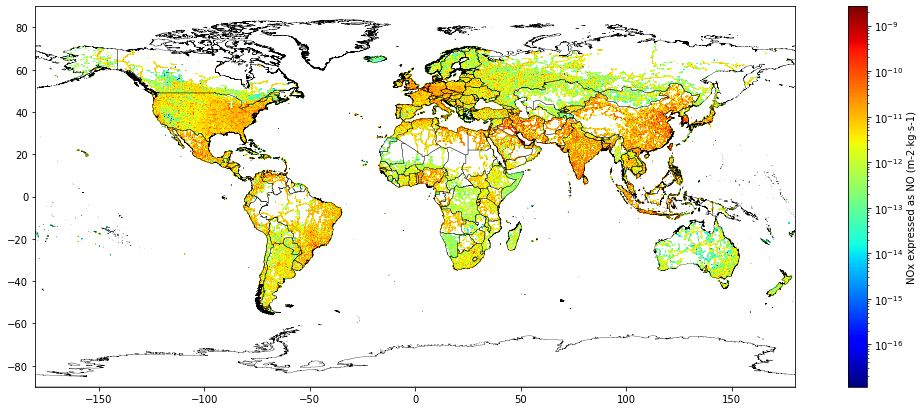

In [15]:
fig, ax = plt.subplots(1, figsize=(19, 7))
plt.pcolormesh(lon_bnds, lat_bnds, nessy.variables['nox_no']['data'].sum(axis=(0, 1)), cmap='jet', 
               norm=matplotlib.colors.LogNorm())
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
plt.colorbar(ax=ax, label='NOx expressed as NO (m-2·kg·s-1)')
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [16]:
nessy.to_netcdf('regular_grid.nc', info=True)

Rank 000: Creating regular_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done
Rank 000: Cell measures done
Rank 000: Writing nox_no var (1/1)
Rank 000: Var nox_no created (1/1)
Rank 000: Filling nox_no)
Rank 000: Var nox_no data (1/1)
Rank 000: Var nox_no completed (1/1)


### Write shapefile

In [17]:
nessy.to_shapefile('regular_grid_shp')

/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3058: UserWarning: No vertical level has been specified. The first one will be selected.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3069: UserWarning: No time has been specified. The first one will be selected.
  warnings.warn(msg)
